In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cufflinks as cf
import plotly.express as px

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Importar archivo y limpieza previa

In [6]:
df = pd.read_csv('pelis_fa_pr06.csv')

In [7]:
df.loc[0,'actor']

"['Documental']"

In [8]:
df.head()

,Unnamed: 0,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
0,0,0,Fahrenheit 9/11,2004,2000,['Michael Moore'],['Documental'],"['Documental', '11-S', 'Guerra de Iraq']",Estados Unidos,6.99,69775,Película
1,1,1,La noche más oscura (Zero Dark Thirty),2012,2010,['Kathryn Bigelow'],"['Jessica Chastain', 'Joel Edgerton', 'Taylor ...","['Thriller', 'Acción', 'Drama', 'Terrorismo', ...",Estados Unidos,6.79,36704,Película
2,2,2,La última noche,2002,2000,['Spike Lee'],"['Edward Norton', 'Philip Seymour Hoffman', 'B...","['Drama', 'Película de culto', '11-S']",Estados Unidos,7.49,33793,Película
3,3,3,Zeitgeist: The Movie,2007,2000,['Peter Joseph'],['Documental'],"['Documental', 'Religión', '11-S', 'Cine indep...",Estados Unidos,7.36,21808,Película
4,4,4,United 93 (Vuelo 93),2006,2000,['Paul Greengrass'],"['Christian Clemenson', 'Cheyenne Jackson', 'B...","['Drama', '11-S', 'Basado en hechos reales', '...",Estados Unidos,6.70,19146,Película


In [9]:
df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
df['direccion'] = df['direccion'].apply(lambda x: eval(x))
df['actor'] = df['actor'].apply(lambda x: eval(x))
df['genero'] = df['genero'].apply(lambda x: eval(x))

In [11]:
df.loc[0,'actor']

['Documental']

In [12]:
df.head()

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
0,0,Fahrenheit 9/11,2004,2000,[Michael Moore],[Documental],"[Documental, 11-S, Guerra de Iraq]",Estados Unidos,6.99,69775,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],"[Jessica Chastain, Joel Edgerton, Taylor Kinne...","[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película
2,2,La última noche,2002,2000,[Spike Lee],"[Edward Norton, Philip Seymour Hoffman, Barry ...","[Drama, Película de culto, 11-S]",Estados Unidos,7.49,33793,Película
3,3,Zeitgeist: The Movie,2007,2000,[Peter Joseph],[Documental],"[Documental, Religión, 11-S, Cine independient...",Estados Unidos,7.36,21808,Película
4,4,United 93 (Vuelo 93),2006,2000,[Paul Greengrass],"[Christian Clemenson, Cheyenne Jackson, Ben Sl...","[Drama, 11-S, Basado en hechos reales, Terrori...",Estados Unidos,6.70,19146,Película


## Reminder: query standard

In [13]:
# Ejemplo de query estándar: las 5 mejores pelis suspensas (por debajo de 5.0)

df[((df['puntuacion'] < 5))].sort_values('votos', ascending=False).head(5)

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
576,576,Dos tontos muy tontos,1994,1990,"[Peter Farrelly, Bobby Farrelly]","[Jim Carrey, Jeff Daniels, Lauren Holly, Mike ...","[Comedia, Comedia absurda, Amistad, Road Movie]",Estados Unidos,4.97,127653,Película
1514,1514,Waterworld,1995,1990,[Kevin Reynolds],"[Kevin Costner, Jeanne Tripplehorn, Dennis Hop...","[Ciencia ficción, Aventuras, Acción, Futuro po...",Estados Unidos,4.82,80212,Película
661,661,Dr. Dolittle,1998,1990,[Betty Thomas],"[Eddie Murphy, Ossie Davis, Oliver Platt, Pete...","[Comedia, Animales, Remake]",Estados Unidos,4.25,77639,Película
283,283,Ace Ventura: Operación África,1995,1990,[Steve Oedekerk],"[Jim Carrey, Ian McNeice, Simon Callow, Maynar...","[Comedia, Aventuras, África, Secuela]",Estados Unidos,4.99,76700,Película
5149,5149,Misión imposible 2,2000,2000,[John Woo],"[Tom Cruise, Dougray Scott, Thandie Newton, Ri...","[Acción, Espionaje, Secuela]",Estados Unidos,4.82,75538,Película


## Reminder: explode()

In [14]:
# Ejemplo de query con .explode() para los campos que son una lista

df.explode('actor')[df.explode('actor')['actor'] == 'Nicolas Cage'].sort_values('año', ascending=False)

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
9454,9454,Mandy,2018,2010,[Panos Cosmatos],Nicolas Cage,"[Thriller, Acción, Terror, Venganza, Sectas, G...",Estados Unidos,5.68,6694,Película
8328,8328,Mamá y papá,2017,2010,[Brian Taylor],Nicolas Cage,"[Comedia, Terror, Thriller, Comedia de terror,...",Estados Unidos,5.10,4179,Película
10850,10850,Hombres de valor,2016,2010,[Mario Van Peebles],Nicolas Cage,"[Bélico, Drama, Basado en hechos reales, Avent...",Estados Unidos,4.25,654,Película
6443,6443,La noche de los desaparecidos,2015,2010,[Uli Edel],Nicolas Cage,"[Terror, Thriller, Sobrenatural, Serie B, Secu...",Estados Unidos,3.88,1458,Película
406,406,Joe,2013,2010,[David Gordon Green],Nicolas Cage,"[Drama, Drama sureño, Vida rural (Norteamérica...",Estados Unidos,5.97,3819,Película
7776,7776,Ghost Rider: Espíritu de venganza,2012,2010,"[Mark Neveldine, Brian Taylor]",Nicolas Cage,"[Fantástico, Acción, Superhéroes, Cómic, Marve...",Estados Unidos,3.31,10709,Película
2217,2217,En tiempo de brujas,2011,2010,[Dominic Sena],Nicolas Cage,"[Fantástico, Terror, Aventuras, Edad Media, Si...",Estados Unidos,4.32,10945,Película
3255,3255,Kick-Ass: Listo para machacar,2010,2010,[Matthew Vaughn],Nicolas Cage,"[Acción, Comedia, Drama, Comedia negra, Cómic,...",Reino Unido,6.77,64916,Película
2210,2210,El aprendiz de brujo,2010,2010,[Jon Turteltaub],Nicolas Cage,"[Fantástico, Aventuras, Acción, Comedia, Magia...",Estados Unidos,4.86,14154,Película
2417,2417,Señales del futuro,2009,2000,[Alex Proyas],Nicolas Cage,"[Ciencia ficción, Fantástico, Thriller, Catást...",Estados Unidos,5.41,26278,Película


## Reminder: query complicada - top 5 actores década

In [15]:
# Con esta query nos está considerando actores con 1 sola peli, probablemente extras

df.explode('actor').groupby('actor').mean().sort_values('puntuacion', ascending=False)

,id_peli,año,decada,puntuacion,votos
actor,,,,,
Richard S. Castellano,1007.0,1972.0,1970.0,9.04,170784.0
Betsy Brandt,3251.0,2008.0,2000.0,8.78,98678.0
Steven Michael Quezada,3251.0,2008.0,2000.0,8.78,98678.0
RJ Mitte,3251.0,2008.0,2000.0,8.78,98678.0
Jonathan Sagall,1825.0,1993.0,1990.0,8.65,171177.0
...,...,...,...,...,...
Ken Del Vecchio,8478.0,2016.0,2010.0,1.37,139.0
Lacy Marie Meyer,8478.0,2016.0,2010.0,1.37,139.0
Mandy Bruno Bogue,8478.0,2016.0,2010.0,1.37,139.0


In [16]:
# Sacamos un nuevo df con los actores desplegados

actorexp = df.explode('actor')

In [17]:
# Y le añadimos una columna con el nº de pelis de cada uno

#for i,c in actorexp.iterrows():
 #   actorexp.loc[i, 'numpelis'] = actorexp[actorexp['actor'] == c['actor']]['id_peli'].count()

In [18]:
actorexp.head()

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
0,0,Fahrenheit 9/11,2004,2000,[Michael Moore],Documental,"[Documental, 11-S, Guerra de Iraq]",Estados Unidos,6.99,69775,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],Jessica Chastain,"[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],Joel Edgerton,"[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],Taylor Kinney,"[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],Kyle Chandler,"[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película


In [19]:
# Ahora ya podemos hacer la query anterior filtrando numpelis > 5

#actorexp[actorexp['numpelis'] > 5].groupby('actor').mean().sort_values('puntuacion', ascending=False).head(30)

In [20]:
df.explode('actor')['actor'].count()

81387

In [21]:
actorexp[actorexp['actor'] == 'Betsy Brandt']['id_peli'].count()

1

In [22]:
df.explode('actor')[df.explode('actor')['actor'] == 'Betsy Brandt']['id_peli'].count()

1

# Probabilidades

## ANOVA con 5 actores

In [23]:
top10act = pd.read_csv('SQL-top10actores_puntuacion.csv', index_col=False)

In [24]:
top10act[top10act['decada']==2010]

,Unnamed: 0,decada,actor,puntuacion,numpelis,rankdecada
0,0,2010,Leonardo DiCaprio,7.21,8,1
1,1,2010,Tom Hardy,6.77,11,2
2,2,2010,Christian Bale,6.76,8,3
3,3,2010,Benedict Cumberbatch,6.71,13,4
4,4,2010,John Hawkes,6.67,6,5
5,5,2010,Sarah Paulson,6.64,6,6
6,6,2010,Robin Wright,6.60,7,7
7,7,2010,Ricardo Darín,6.59,6,8
8,8,2010,Bruce Dern,6.59,6,8
9,9,2010,Mark Ruffalo,6.57,13,9


In [25]:
# Sacamos la lista de los top 10 actores de 2010

top10act2010 = top10act[top10act['decada'] == 2010]['actor'].to_list()
top10act2010

['Leonardo DiCaprio',
 'Tom Hardy',
 'Christian Bale',
 'Benedict Cumberbatch',
 'John Hawkes',
 'Sarah Paulson',
 'Robin Wright',
 'Ricardo Darín',
 'Bruce Dern',
 'Mark Ruffalo',
 'Chris Evans',
 'Kyle Chandler']

In [26]:
actorexp[actorexp['actor'] == 'Tom Hardy']['puntuacion']

307      7.06
896      8.12
1135     6.42
1303     7.36
1829     7.25
1835     7.05
2497     4.90
3376     7.49
4729     6.38
4828     6.29
5730     7.12
5925     6.16
7311     7.14
7319     6.41
7321     6.78
7646     2.99
9345     7.98
10420    5.64
Name: puntuacion, dtype: float64

In [27]:
rating_totals = []
for x in top10act2010:
    rating_totals.append(actorexp[actorexp['actor'] == x]['puntuacion'].to_list())

In [28]:
rating_totals

[[6.81,
  6.25,
  7.3,
  6.35,
  6.11,
  7.59,
  6.94,
  7.28,
  7.06,
  7.55,
  6.73,
  7.25,
  6.12,
  6.44,
  7.86,
  7.13,
  7.86,
  6.86,
  6.54,
  5.61,
  7.98,
  5.75],
 [7.06,
  8.12,
  6.42,
  7.36,
  7.25,
  7.05,
  4.9,
  7.49,
  6.38,
  6.29,
  7.12,
  6.16,
  7.14,
  6.41,
  6.78,
  2.99,
  7.98,
  5.64],
 [5.96,
  5.22,
  6.33,
  6.33,
  6.6,
  7.17,
  6.5,
  4.04,
  6.75,
  7.13,
  8.12,
  7.38,
  7.49,
  5.28,
  6.45,
  7.08,
  6.42,
  5.91,
  7.35,
  7.14,
  6.71,
  7.4,
  6.22,
  6.1,
  6.82,
  6.87,
  6.92,
  4.36],
 [6.53,
  7.14,
  6.46,
  6.86,
  7.22,
  6.42,
  6.14,
  7.99,
  6.81,
  7.33,
  7.68,
  6.73,
  6.12,
  6.72,
  6.41,
  7.24,
  6.18,
  7.75,
  6.5,
  7.5,
  6.45,
  6.8,
  5.38,
  8.15,
  8.24,
  7.86,
  7.92,
  7.82,
  7.6,
  7.25,
  7.06,
  7.75,
  7.44,
  6.51,
  7.41],
 [7.62, 6.25, 5.55, 6.67, 5.21, 6.83, 5.4, 6.8, 6.39, 6.45, 6.5],
 [6.95,
  7.33,
  6.27,
  3.7,
  7.64,
  7.54,
  5.07,
  5.7,
  6.01,
  6.66,
  6.39,
  6.32,
  6.3,
  6.57,
  6.38,

In [29]:
stats.f_oneway(*rating_totals)

F_onewayResult(statistic=2.3451129596510056, pvalue=0.009453961660973566)

In [30]:
_, p = stats.f_oneway(*rating_totals)
print(p)
            
if p>=0.05:
    print(f'p_value = {p}. Aceptamos hipótesis nula')
else:
    print(f'p_value = {p}. Rechazamos hipótesis nula')

0.009453961660973566
p_value = 0.009453961660973566. Rechazamos hipótesis nula


In [31]:
type(p)

numpy.float64

In [32]:
actorexp[actorexp['actor'].isin(top10act2010)]

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],Kyle Chandler,"[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película
39,39,Titanic,1997,1990,[James Cameron],Leonardo DiCaprio,"[Romance, Drama, Aventuras, Drama romántico, B...",Estados Unidos,6.81,177813,Película
50,50,Los vengadores,2012,2010,[Joss Whedon],Chris Evans,"[Fantástico, Acción, Ciencia ficción, Superhér...",Estados Unidos,6.90,79027,Película
50,50,Los vengadores,2012,2010,[Joss Whedon],Mark Ruffalo,"[Fantástico, Acción, Ciencia ficción, Superhér...",Estados Unidos,6.90,79027,Película
62,62,Capitán América: El primer vengador,2011,2010,[Joe Johnston],Chris Evans,"[Acción, Fantástico, Superhéroes, Cómic, Marve...",Estados Unidos,5.74,55069,Película
...,...,...,...,...,...,...,...,...,...,...,...
10806,10806,La sombra del reino,2007,2000,[Peter Berg],Kyle Chandler,"[Thriller, Acción, Terrorismo]",Estados Unidos,6.24,9222,Película
10808,10808,El hombre más buscado,2014,2010,[Anton Corbijn],Robin Wright,"[Thriller, Espionaje, Terrorismo]",Reino Unido,6.23,8921,Película
11157,11157,La mandolina del capitán Corelli,2001,2000,[John Madden],Christian Bale,"[Drama, Romance, Bélico, II Guerra Mundial, Dr...",Estados Unidos,4.36,6394,Película
11160,11160,Mud,2012,2010,[Jeff Nichols],Sarah Paulson,"[Drama, Aventuras, Vida rural (Norteamérica), ...",Estados Unidos,6.79,22730,Película


In [33]:
top10act2010

['Leonardo DiCaprio',
 'Tom Hardy',
 'Christian Bale',
 'Benedict Cumberbatch',
 'John Hawkes',
 'Sarah Paulson',
 'Robin Wright',
 'Ricardo Darín',
 'Bruce Dern',
 'Mark Ruffalo',
 'Chris Evans',
 'Kyle Chandler']

In [34]:
from ipywidgets import interact

In [35]:
@interact(i = top10act2010)
def show(i):
    print(i)

interactive(children=(Dropdown(description='i', options=('Leonardo DiCaprio', 'Tom Hardy', 'Christian Bale', '…

In [36]:
actorexp[(actorexp['actor'] == 'Tom Hardy') | (actorexp['actor'] == 'Leonardo DiCaprio') | (actorexp['actor'] == 'John Hawkes')]
         
         

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
39,39,Titanic,1997,1990,[James Cameron],Leonardo DiCaprio,"[Romance, Drama, Aventuras, Drama romántico, B...",Estados Unidos,6.81,177813,Película
78,78,El gran Gatsby,2013,2010,[Baz Luhrmann],Leonardo DiCaprio,"[Drama, Romance, Drama romántico, Años 20, 3-D]",Australia,6.25,43127,Película
89,89,Tres anuncios en las afueras,2017,2010,[Martin McDonagh],John Hawkes,"[Thriller, Drama, Comedia, Comedia negra, Raci...",Reino Unido,7.62,47080,Película
284,284,Diamante de sangre,2006,2000,[Edward Zwick],Leonardo DiCaprio,"[Aventuras, Thriller, África, Años 90]",Estados Unidos,7.30,73454,Película
307,307,Taboo (Serie de TV),2017,2010,"[Steven Knight, Kristoffer Nyholm, Anders Engs...",Tom Hardy,"[Serie de TV, Drama, Siglo XIX, África, Coloni...",Reino Unido,7.06,8921,Serie de TV
431,431,Everest,2015,2010,[Baltasar Kormákur],John Hawkes,"[Aventuras, Drama, Basado en hechos reales, Al...",Estados Unidos,6.25,24518,Película
896,896,Peaky Blinders (Serie de TV),2013,2010,"[Steven Knight, Colm McCarthy, Tim Mielants]",Tom Hardy,"[Serie de TV, Drama, Thriller, Mafia, Años 191...",Reino Unido,8.12,28890,Serie de TV
939,939,El aviador,2004,2000,[Martin Scorsese],Leonardo DiCaprio,"[Drama, Biográfico, Cine dentro del cine, Avio...",Estados Unidos,6.35,55236,Película
946,946,J. Edgar,2011,2010,[Clint Eastwood],Leonardo DiCaprio,"[Drama, Biográfico, Política, Histórico, Homos...",Estados Unidos,6.11,25908,Película
1046,1046,Shutter Island,2010,2010,[Martin Scorsese],Leonardo DiCaprio,"[Thriller, Intriga, Thriller psicológico, Años...",Estados Unidos,7.59,121242,Película


#### BOXPLOT PVALUE RATING ACTORES

EXTRA: preguntarle al usuario cúantos actores quiere comparar

In [37]:
top10act = pd.read_csv('SQL-top10actores_puntuacion.csv', index_col=False)

In [38]:
actores = sorted(top10act['actor'].to_list())

In [ ]:
def test(n):
    for x in n:
        @interact(actor1 = actores, calcular_pvalue = ['si','no'])
        def show(actor1,actor2,actor3,calcular_pvalue='no'):
        
            a= sns.catplot( data=actorexp[(actorexp['actor'] == actor1) | (actorexp['actor'] == actor2) | (actorexp['actor'] == actor3)] ,
                       x='actor', y='puntuacion', kind='box', height=6, aspect=2)
            _=a.set_xticklabels(rotation=90)
            
            if calcular_pvalue == 'si':
                
                rating = []
                for act in [actor1,actor2,actor3]:
                    
                    rating.append(actorexp[actorexp['actor'] == act]['puntuacion'].to_list())
                    
                _, p = stats.f_oneway(*rating)
                    
                if p>=0.05:
                    print(f'p_value = {p}\nAceptamos hipótesis nula\nNO hay diferencias significativas entre las distribuciones de sus ratings')
                else:
                    print(f'p_value = {p}\nRechazamos hipótesis nula\nSÍ hay diferencias significativas entre las distribuciones de sus ratings')
    
    

In [39]:
@interact(actor1 = actores, actor2 = actores, actor3 = actores, calcular_pvalue = ['si','no'])
def show(actor1,actor2,actor3,calcular_pvalue='no'):

    a= sns.catplot( data=actorexp[(actorexp['actor'] == actor1) | (actorexp['actor'] == actor2) | (actorexp['actor'] == actor3)] ,
               x='actor', y='puntuacion', kind='box', height=6, aspect=2)
    _=a.set_xticklabels(rotation=90)
    
    if calcular_pvalue == 'si':
        
        rating = []
        for act in [actor1,actor2,actor3]:
            
            rating.append(actorexp[actorexp['actor'] == act]['puntuacion'].to_list())
            
        _, p = stats.f_oneway(*rating)
            
        if p>=0.05:
            print(f'p_value = {p}\nAceptamos hipótesis nula\nNO hay diferencias significativas entre las distribuciones de sus ratings')
        else:
            print(f'p_value = {p}\nRechazamos hipótesis nula\nSÍ hay diferencias significativas entre las distribuciones de sus ratings')
            

interactive(children=(Dropdown(description='actor1', options=('Agustín González', 'Al Pacino', 'Andy Serkis', …

#### INTERVALOS DE CONFIANZA

MEJORAR ESTÉTICA:
- Añadir etiquetas


EXTRA: intentar hacerlo con plotly

In [40]:
@interact(actor = actores, intervalo = list(range(80,100)))

def ic(actor, intervalo):
    sample = actorexp[actorexp['actor'] == actor]['puntuacion'].to_list()
    n = len(sample) - 1
    std = np.std(sample)
    sample_mean = np.mean(sample)
    std_error = std / np.sqrt(n)
    rat = stats.norm(sample_mean, std_error)
    low = rat.ppf((100 - intervalo)/200)
    high = rat.ppf(1-(100 - intervalo)/200)
    print(low)
    print(high)
    ax = sns.distplot(sample)
    ax.set(xlim=(0,10))
    kde_x, kde_y = ax.lines[0].get_data()
    p1 = plt.axvline(x=low, color='black')
    p2 = plt.axvline(x=high, color='black')
    ax.fill_between(kde_x, kde_y, where=(kde_x>=low) & (kde_x<=high), color='black')
    

interactive(children=(Dropdown(description='actor', options=('Agustín González', 'Al Pacino', 'Andy Serkis', '…

#### TWO-SAMPLE INDEPENDENT TEXT: ¿MERECE LA PENA CONTRATAR X ACTOR?

In [41]:
@interact(actor=actores)

def ttest(actor):
    t1 = actorexp[actorexp['actor'] == actor]['puntuacion'] 
    
    # Sacamos el género más popular
    t1gen = actorexp[actorexp['actor'] == actor].explode('genero')['genero'].value_counts().index[0]
    
    # Sacamos los años entre los cuales el actor estuvo activo
    t1añolow = actorexp[actorexp['actor'] == actor]['año'].min()
    t1añohigh = actorexp[actorexp['actor'] == actor]['año'].max()
    
    # Sacamos el dataframe con todas las pelis de ese género y en esos años
    
    # Primero sacamos el df con el género explotado, filtramos por género y volvemos a explotar por actor
    a = df.explode('genero')[df.explode('genero')['genero'] == t1gen].explode('actor')
    
    # Filtramos todas las pelis en las que no ha actuado nuestro actor y borramos duplicados con 'id peli' para no repetir películas
    b = a[a['actor'] != actor].drop_duplicates('id_peli')
    
    # Nuestro segundo set serán las pelis entre los años en los que estuvo activo
    t2 = b[(b['año'] >= t1añolow) & (b['año'] <= t1añohigh)]['puntuacion']
    
    # Hacemos el ttest
    stat, p = stats.ttest_ind(t1,t2,equal_var=False)
    
    plt.figure('Ttest')
    sns.distplot(t1, label=actor)
    sns.distplot(t2, label='Resto de pelis')
    plt.legend()

    
    print(f'Distribución de las puntuaciones de las pelis de {actor} con el resto de pelis relevantes con las siguientes características:')
    print(f'Género más relevante: {t1gen}')
    print(f'Años en los que {actor} estuvo activo: desde {t1añolow} hasta {t1añohigh}')
    print('\n')
    if p>=0.05:
        print(f'p_value = {p}\nAceptamos hipótesis nula\nNO hay diferencias significativas entre las distribuciones de sus ratings')
    else:
        print(f'p_value = {p}\nRechazamos hipótesis nula\nSÍ hay diferencias significativas entre las distribuciones de sus ratings')
    

interactive(children=(Dropdown(description='actor', options=('Agustín González', 'Al Pacino', 'Andy Serkis', '…

#### PREDICCIÓN

In [42]:
pr = df[['año', 'direccion', 'genero', 'pais', 'puntuacion', 'votos']]

In [43]:
pr.head()

,año,direccion,genero,pais,puntuacion,votos
0,2004,[Michael Moore],"[Documental, 11-S, Guerra de Iraq]",Estados Unidos,6.99,69775
1,2012,[Kathryn Bigelow],"[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704
2,2002,[Spike Lee],"[Drama, Película de culto, 11-S]",Estados Unidos,7.49,33793
3,2007,[Peter Joseph],"[Documental, Religión, 11-S, Cine independient...",Estados Unidos,7.36,21808
4,2006,[Paul Greengrass],"[Drama, 11-S, Basado en hechos reales, Terrori...",Estados Unidos,6.70,19146


In [44]:
pr['direccion'] = pr['direccion'].apply(lambda x:x[0])

In [45]:
pr['genero'] = pr['genero'].apply(lambda x:x[0])

In [46]:
rest = ['Francia', 'Reino Unido', 'Alemania',
       'Italia', 'Suecia','España', 'Dinamarca', 'Irlanda', 
       'Bélgica', 'Estonia', 'Ucrania','Alemania del Oeste (RFA)', 'Noruega', 
       'Suiza', 'Islandia', 'Polonia', 'Unión Soviética (URSS)', 'Austria', 'Turquía',
       'Bulgaria', 'Grecia', 'Checoslovaquia', 'Eslovenia', 'Países Bajos (Holanda)', 'República Checa',
       'Serbia y Montenegro', 'Georgia', 'Portugal', 'Finlandia', 'Luxemburgo', 'Rusia',
       'Yugoslavia', 'Hungría','Lituania', 'Rumanía', 'Serbia', 'Bosnia y Herzegovina', 'Croacia',
       'Macedonia', 'Alemania del Este (RDA)','Eslovaquia', 'Estados Unidos']

In [47]:
eur = rest[:-1]

In [48]:
pr['pais'] = pr['pais'].apply(lambda x: 'Resto' if x not in rest else x)

In [49]:
pr['pais'] = pr['pais'].apply(lambda x: 'Europa' if x in eur else x)

In [50]:
pr['pais'].value_counts()

Estados Unidos    6184
Europa            3877
Resto             1447
Name: pais, dtype: int64

In [51]:
pr['genero'].value_counts().head(9).index.to_list()

['Drama',
 'Serie de TV',
 'Animación',
 'Comedia',
 'Documental',
 'Terror',
 'Acción',
 'Ciencia ficción',
 'Thriller']

In [52]:
# Borramos series, animación y documentales:

generos = ['Drama', 'Comedia', 'Terror', 'Acción', 'Ciencia ficción', 'Thriller']

In [53]:
# Filtramos nuestro df por estos géneros

pr = pr[pr['genero'].isin(generos)]

In [54]:
# Usaremos los 10 directores más prolíficos

directores = pr[pr['año'] > 1980]['direccion'].value_counts().head(10).index.to_list()

In [55]:
# Actualizamos de nuevo nuestro df

pr = pr[pr['direccion'].isin(directores)]

In [56]:
# Reset index

pr.reset_index(drop=True, inplace=True)
pr.head(5)

,año,direccion,genero,pais,puntuacion,votos
0,2015,Ridley Scott,Ciencia ficción,Estados Unidos,7.00,62829
1,2004,Pedro Almodóvar,Drama,Europa,6.05,39344
2,1987,Joel Coen,Comedia,Estados Unidos,6.60,18713
3,1988,Clint Eastwood,Drama,Estados Unidos,7.38,9883
4,1977,Clint Eastwood,Acción,Estados Unidos,6.05,5945


In [57]:
# Pasamos variables categóricas a numéricas con get_dummies()

gd = pd.get_dummies(pr)
gd

,año,puntuacion,votos,direccion_Clint Eastwood,direccion_Joel Coen,direccion_Martin Scorsese,direccion_Pedro Almodóvar,direccion_Ridley Scott,direccion_Steven Soderbergh,direccion_Steven Spielberg,...,direccion_Álex de la Iglesia,genero_Acción,genero_Ciencia ficción,genero_Comedia,genero_Drama,genero_Terror,genero_Thriller,pais_Estados Unidos,pais_Europa,pais_Resto
0,2015,7.00,62829,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2004,6.05,39344,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1987,6.60,18713,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1988,7.38,9883,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1977,6.05,5945,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1986,5.60,6315,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
175,2018,4.78,5320,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
176,1989,6.23,11276,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
177,2003,6.32,1658,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [58]:
X = gd.drop(['año', 'puntuacion', 'votos'], axis=1).values

In [59]:
y = gd['puntuacion']

In [60]:
lr = LinearRegression()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
lr.score(X_train, y_train)

0.2743571977136917

In [64]:
lr.score(X_test, y_test)

0.21552905859496008

In [65]:
len(gd)

179

In [66]:
gd.drop(['año', 'puntuacion', 'votos'], axis=1).columns

Index(['direccion_Clint Eastwood', 'direccion_Joel Coen',
       'direccion_Martin Scorsese', 'direccion_Pedro Almodóvar',
       'direccion_Ridley Scott', 'direccion_Steven Soderbergh',
       'direccion_Steven Spielberg', 'direccion_Takashi Miike',
       'direccion_Woody Allen', 'direccion_Álex de la Iglesia',
       'genero_Acción', 'genero_Ciencia ficción', 'genero_Comedia',
       'genero_Drama', 'genero_Terror', 'genero_Thriller',
       'pais_Estados Unidos', 'pais_Europa', 'pais_Resto'],
      dtype='object')

In [67]:
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [68]:
# Clint Eastwood, Acción, EEUU

lr.predict([[1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0]])

array([6.24804688])

In [69]:
directores

['Woody Allen',
 'Steven Spielberg',
 'Pedro Almodóvar',
 'Martin Scorsese',
 'Álex de la Iglesia',
 'Joel Coen',
 'Steven Soderbergh',
 'Clint Eastwood',
 'Ridley Scott',
 'Takashi Miike']

In [70]:
_ = dict(keys=[a for a in directores], values=[0 for a in range(len(directores))])

In [71]:
_ = {'Woody Allen': 0, 'Martin Scorsese': 0}

In [72]:
_

{'Woody Allen': 0, 'Martin Scorsese': 0}

In [73]:
_['Woody Allen'] = 1

In [74]:
_

{'Woody Allen': 1, 'Martin Scorsese': 0}

In [75]:
list(_.values())

[1, 0]

In [76]:
[[1,0] + [1,1,0] + [1,0,0,0,1]]

[[1, 0, 1, 1, 0, 1, 0, 0, 0, 1]]

In [77]:
def predict(director, genero, pais):
    dic[director] = 1
    dic[genero] = 1
    dic[pais] = 1
    

<AxesSubplot:xlabel='genero', ylabel='puntuacion'>

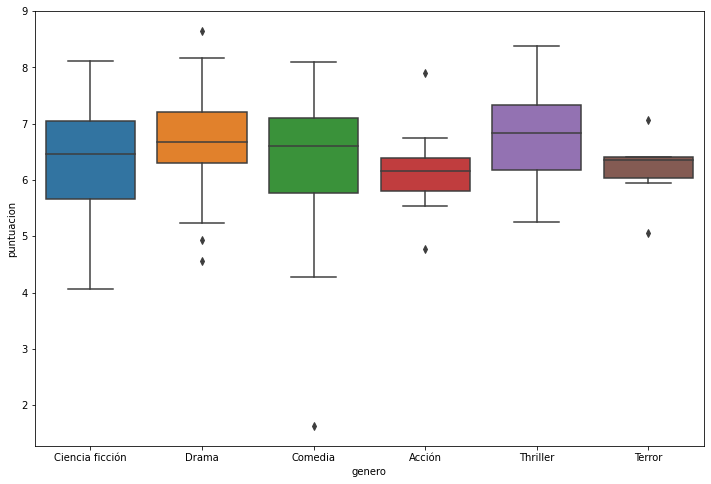

In [78]:
sns.boxplot(data=pr, x='genero', y='puntuacion')

<AxesSubplot:xlabel='pais', ylabel='puntuacion'>

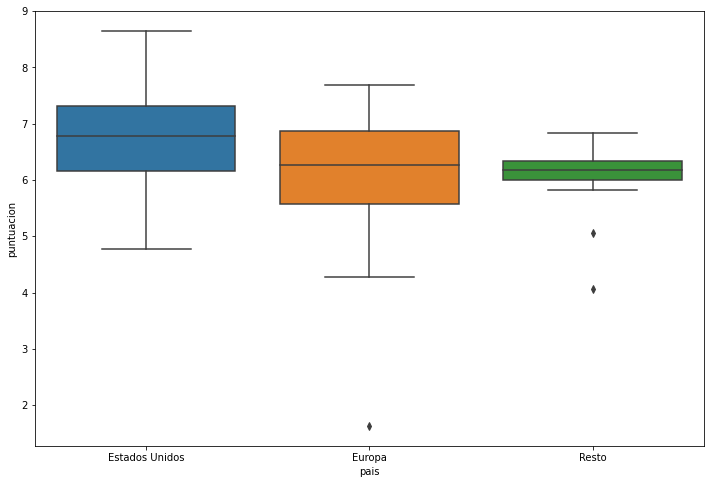

In [79]:
sns.boxplot(data=pr, x='pais', y='puntuacion')

<AxesSubplot:xlabel='direccion', ylabel='puntuacion'>

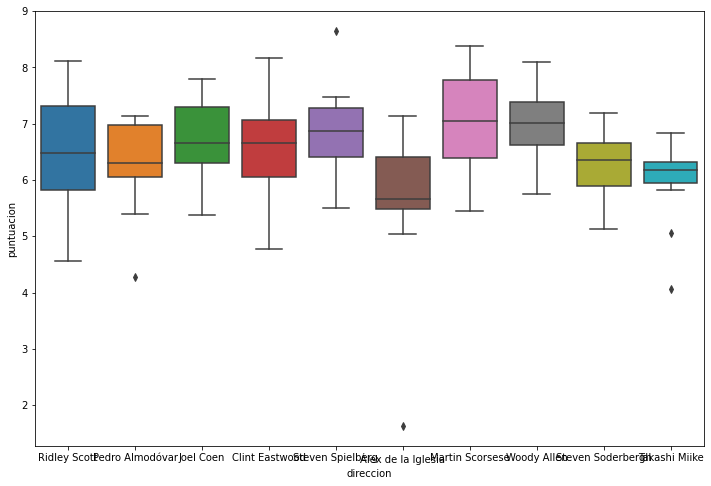

In [80]:
sns.boxplot(data=pr, x='direccion', y='puntuacion')

In [81]:
pr

,año,direccion,genero,pais,puntuacion,votos
0,2015,Ridley Scott,Ciencia ficción,Estados Unidos,7.00,62829
1,2004,Pedro Almodóvar,Drama,Europa,6.05,39344
2,1987,Joel Coen,Comedia,Estados Unidos,6.60,18713
3,1988,Clint Eastwood,Drama,Estados Unidos,7.38,9883
4,1977,Clint Eastwood,Acción,Estados Unidos,6.05,5945
...,...,...,...,...,...,...
174,1986,Pedro Almodóvar,Drama,Europa,5.60,6315
175,2018,Clint Eastwood,Acción,Estados Unidos,4.78,5320
176,1989,Ridley Scott,Acción,Estados Unidos,6.23,11276
177,2003,Takashi Miike,Terror,Resto,6.32,1658


In [82]:
stats.ttest_ind(df[(df['pais'] == 'Francia') & (df['votos']>10000)] ['votos'], 
                df[(df['pais'] == 'Alemania') & (df['votos']>10000)] ['votos'],
               equal_var=False)

Ttest_indResult(statistic=-1.2082239072672152, pvalue=0.2374456840329995)

[(10000.0, 200000.0)]

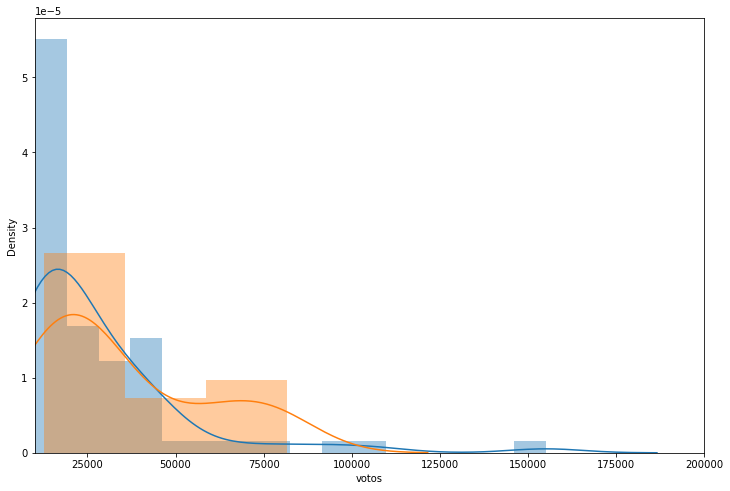

In [83]:
d = sns.distplot(df[(df['pais'] == 'Francia') & (df['votos']>10000)] ['votos'])
d = sns.distplot(df[(df['pais'] == 'Alemania') & (df['votos']>10000)] ['votos'])
d.set(xlim=(10000,200000))


In [84]:
stats.ttest_ind(df[df['pais'] == 'España'] ['puntuacion'], 
                df[df['pais'] == 'Polonia'] ['puntuacion'],
               equal_var=False)

Ttest_indResult(statistic=-5.109461738072027, pvalue=0.00012841532363909347)

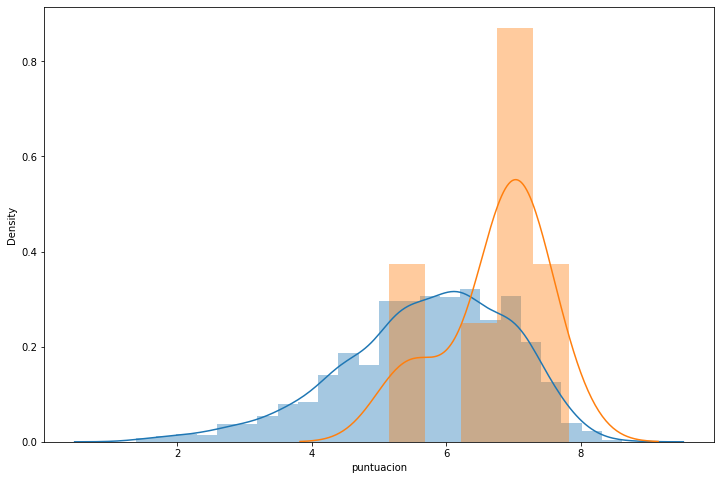

In [85]:
d = sns.distplot(df[df['pais'] == 'España'] ['puntuacion'])
d = sns.distplot(df[df['pais'] == 'Polonia'] ['puntuacion'])